![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [215]:
# Start your code here!
import pandas as pd

men = pd.read_csv("men_results.csv")
women = pd.read_csv("women_results.csv")

# 1. Exploratory Data Analysis

In [216]:
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [217]:
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


## 1.1 See the summary of the column names and data types.

In [218]:
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [219]:
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


## 1.2 Determine the counts of unique values in the categorical columns e.g. home_team, away_team, and tournament.

In [220]:
men['tournament'].value_counts()

Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Real Madrid 75th Anniversary Cup            1
Évence Coppée Trophy                        1
Copa Confraternidad                         1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: tournament, Length: 141, dtype: int64

In [221]:
women['tournament'].value_counts()

UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CONCACAF Gold Cup qualification          143
AFC Asian Cup qualification              141
Copa América                             131
Olympic Games                            130
CONCACAF Gold Cup                        126
Friendly                                 111
AFC Asian Cup                            111
Four Nations Tournament                  106
OFC Championship                          78
African Cup of Nations qualification      58
CONCACAF Championship                     42
SheBelieves Cup                           39
Euro                                      20
African Cu

In [222]:
men['home_team'].value_counts()

Brazil                       594
Argentina                    570
Mexico                       555
Germany                      526
England                      525
                            ... 
Chameria                       1
Romani people                  1
Saint Pierre and Miquelon      1
Western Australia              1
Madrid                         1
Name: home_team, Length: 311, dtype: int64

In [223]:
women['home_team'].value_counts()

United States               269
China PR                    189
Sweden                      171
Norway                      171
Germany                     166
                           ... 
Réunion                       1
Mauritius                     1
Turks and Caicos Islands      1
Western Australia             1
Mauritania                    1
Name: home_team, Length: 198, dtype: int64

In [224]:
men['away_team'].value_counts()

Uruguay          560
Sweden           547
England          524
Hungary          491
Paraguay         474
                ... 
Barawa             1
Surrey             1
Central Spain      1
Andalusia          1
Aymara             1
Name: away_team, Length: 306, dtype: int64

In [225]:
women['away_team'].value_counts()

Denmark       151
Norway        148
Sweden        145
Finland       131
Germany       122
             ... 
Sudan           1
Mauritania      1
Laos            1
Niger           1
Liberia         1
Name: away_team, Length: 196, dtype: int64

# 2. Filtering the data
## 2.1 Filter the data to only include "FIFA World Cup" matches that took place after "2002-01-01".

In [226]:
men_filter = men[(men["tournament"] == "FIFA World Cup" ) & (pd.to_datetime(men["date"]) > "2002-01-01")]
men_filter.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [227]:
women_filter = women[(women["tournament"] == "FIFA World Cup" ) & (pd.to_datetime(women["date"]) > "2002-01-01")]
women_filter.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


## 2.2 Add a "total_goal" column in men and women dataframe for hypothesis test.

In [228]:
men_filter['total_goal'] = men_filter['home_score'] + men_filter['away_score']
women_filter['total_goal'] = women_filter['home_score'] + women_filter['away_score']

In [229]:
men_filter.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_goal
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


In [230]:
women_filter.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_goal
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


# 3. Hypothesis Test
## 3.1 Determine the type of hypothesis test by checking the sample size in each gender group and the normality of each distribution.

In [231]:
print(len(men_filter))
print(len(women_filter))

384
200


In [232]:
import matplotlib.pyplot as plt
%matplotlib inline

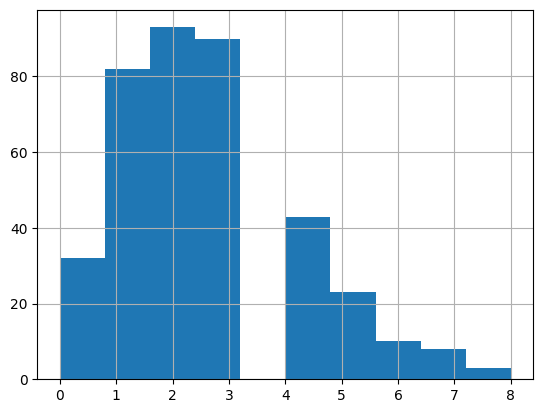

In [233]:
men_filter['total_goal'].hist()
plt.show()

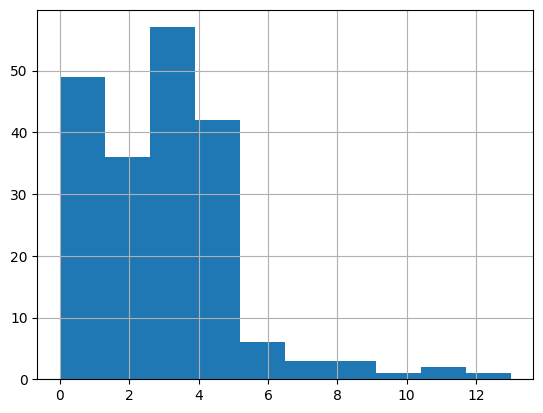

In [234]:
women_filter['total_goal'].hist()
plt.show()

## The histogram distributions of the total goals scored by men and women are not normally distributed. This is an unpaired two-sample test because men and women are two independent groups. Therefore, we will use Wilcoxon-Mann-Whitney test which is a non-parametric version of the unpaired t-test.

## 3.2 Wilcoxon-Mann-Whitney Test

### 3.2.1 Add a "group" column in men and women dataframe.

In [235]:
men_filter['group'] = "men"
women_filter['group'] = "women"
men_filter.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_goal,group
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1,men
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8,men
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2,men
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3,men
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1,men


### 3.2.2 Concatenate the men and women dataframe.

In [236]:
combine = pd.concat([men_filter, women_filter])
combine.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_goal,group
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1,men
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8,men
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2,men
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3,men
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1,men


In [237]:
len(combine)

584

### 3.2.3 Convert the dataframe to wide format.

In [238]:
combine_wide = combine.pivot(columns="group", values="total_goal")
combine_wide.head()

group,men,women
1600,NaN,3.0
1601,NaN,2.0
1602,NaN,5.0
1603,NaN,6.0
1604,NaN,4.0


In [239]:
len(combine_wide)

584

### 3.2.4 Use pingouin to find out the test statistic and p-value via a right-tail test.

In [240]:
import pingouin

test = pingouin.mwu(x=combine_wide["women"], y=combine_wide["men"], alternative="greater")
print(test)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


In [241]:
type(test)

pandas.core.frame.DataFrame

In [242]:
print(test['p-val'][0])

0.005106609825443641


### 3.2.5 Interpret the p-value to determine if there is statistical significance between the two groups, assuming a 10% significance level.

In [243]:
alpha = 0.1

if (test['p-val'][0] < 0.1):
    result = "reject"
else:
    result = "fail to reject"
    
result_dict = {"p_val": test['p-val'][0], "result": result}
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}


### Conclusion: The p-value is lesser than the significance level. Hence, reject the null hypothesis.